In [52]:
import pandas as pd

file_path = "iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(file_path, header=None, names=column_names)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [53]:
import numpy as np

data_array = df.to_numpy()
print(data_array)

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

In [54]:
print(data_array.shape)
print(data_array.size)

(150, 5)
750


In [55]:
setosa = df[df['species'] == 'Iris-setosa']
versicolor = df[df['species'] == 'Iris-versicolor']
virginica = df[df['species'] == 'Iris-virginica']

In [56]:
setosa.to_csv("setosa.csv", index=False)
versicolor.to_csv("versicolor.csv", index=False)
virginica.to_csv("virginica.csv", index=False)

In [57]:
np.save("iris_setosa.npy", setosa.to_numpy())
np.save("iris_versicolor.npy", versicolor.to_numpy())
np.save("iris_virginica.npy", virginica.to_numpy())

In [58]:
np.savez("iris_data.npz",
        setosa= setosa.to_numpy(),
        versicolor= versicolor.to_numpy(),
        virginica= virginica.to_numpy()
        )

In [59]:
iris_setosa = np.load("iris_setosa.npy ", allow_pickle=True)
iris_versicolor = np.load("iris_versicolor.npy ", allow_pickle=True)
iris_virginica = np.load("iris_virginica.npy ", allow_pickle=True)

In [60]:
import matplotlib.pyplot as plt
def plot_iris(data, title):
    plt.figure(figsize=(10, 6))
    for i in range(4):
        plt.plot(data[:, i], label=column_names[i])
    plt.title(title)
    plt.xlabel('Data ke-')
    plt.ylabel('Ukuran iris (cm)')
    plt.legend()
    plt.grid()
    plt.show()


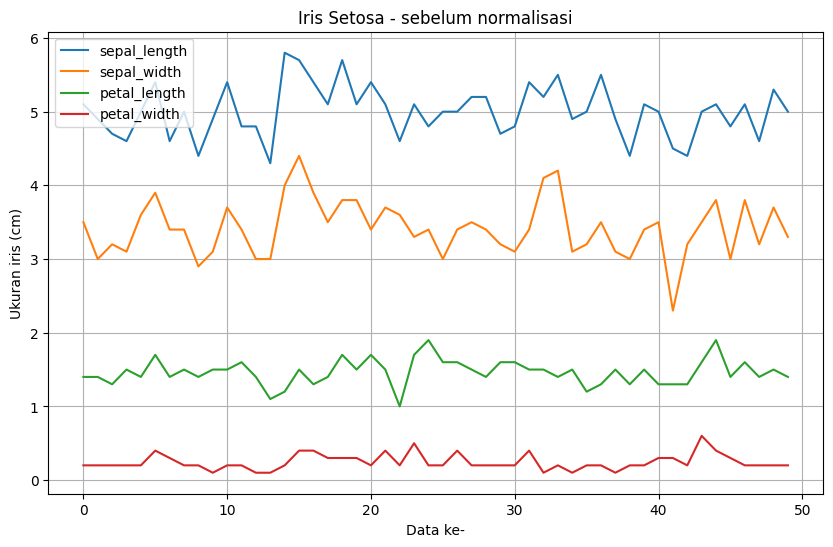

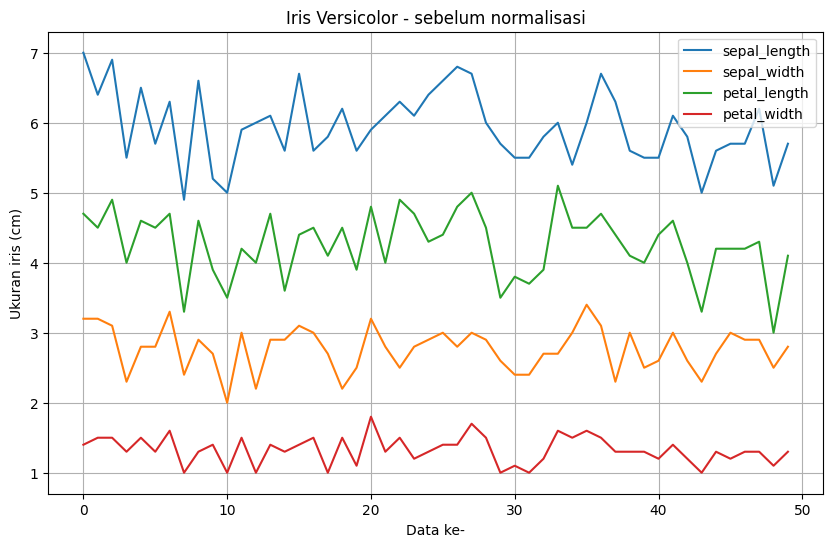

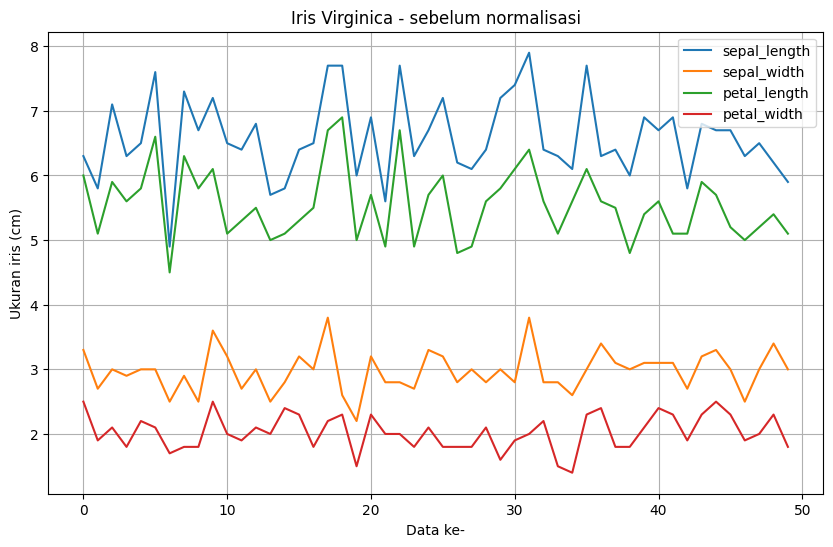

In [61]:
plot_iris(iris_setosa, "Iris Setosa - sebelum normalisasi")
plot_iris(iris_versicolor, "Iris Versicolor - sebelum normalisasi")
plot_iris(iris_virginica, "Iris Virginica - sebelum normalisasi")

In [70]:
def min_max_normalize(data):
    min_vals = data[:, :4].min(axis=0)
    max_vals = data[:, :4].max(axis=0)
    normalized = (data[:, :4] - min_vals) / (max_vals - min_vals)
    return normalized.astype(np.float64)


In [71]:
norm_setosa = min_max_normalize(iris_setosa)
norm_versicolor = min_max_normalize(iris_versicolor)
norm_virginica = min_max_normalize(iris_virginica)

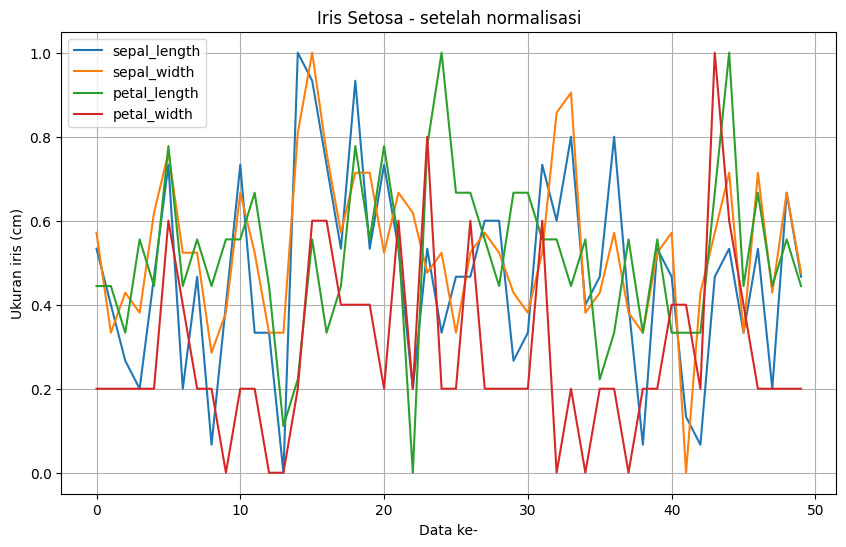

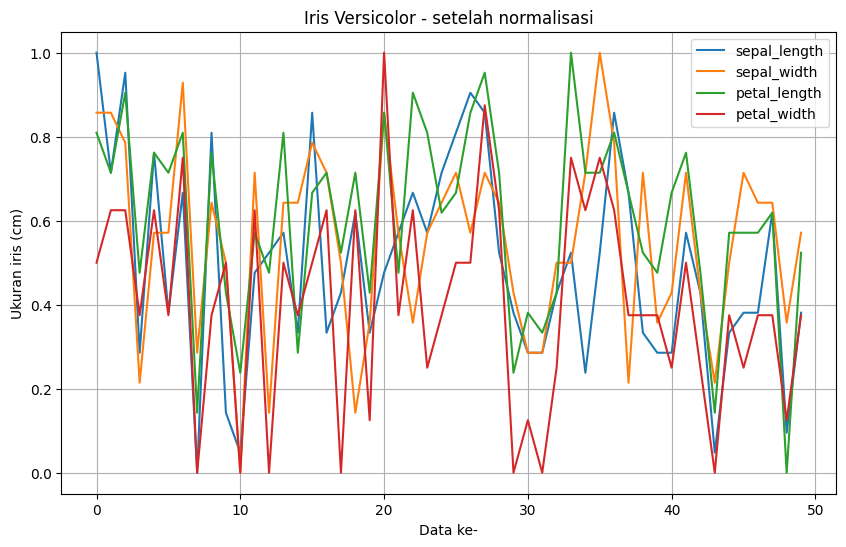

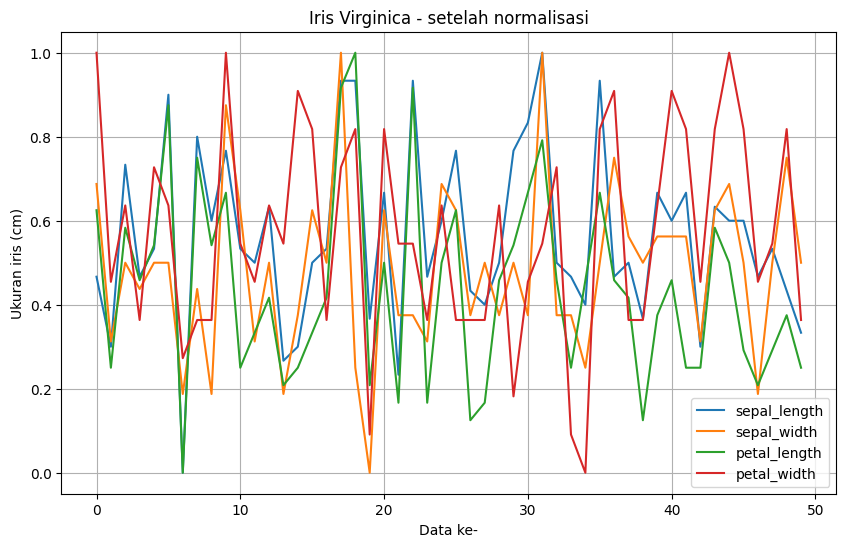

In [72]:
plot_iris(norm_setosa, "Iris Setosa - setelah normalisasi")
plot_iris(norm_versicolor, "Iris Versicolor - setelah normalisasi")
plot_iris(norm_virginica, "Iris Virginica - setelah normalisasi")

In [76]:
NIM = "622022018"

In [ ]:
combined_data = np.vstack([
    np.hstack([norm_setosa, np.full((norm_setosa.shape[0], 1), 0)]),        # Label 0 untuk Setosa
    np.hstack([norm_versicolor, np.full((norm_versicolor.shape[0], 1), 1)]), # Label 1 untuk Versicolor
    np.hstack([norm_virginica, np.full((norm_virginica.shape[0], 1), 2)])    # Label 2 untuk Virginica
])

In [77]:
df_combined = pd.DataFrame(
    combined_data,
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)
csv_filename = f"Percobaan3_{NIM}.csv"
df_combined.to_csv(csv_filename, index=False)

npz_filename = f"Percobaan3_{NIM}.npz"
np.savez(
    npz_filename,
    setosa=norm_setosa,
    versicolor=norm_versicolor,
    virginica=norm_virginica
)


In [78]:
print("\nIsi Percobaan3_622022018.csv:")
print(pd.read_csv(csv_filename).head())


Isi Percobaan3_622022018.csv:
   sepal_length  sepal_width  petal_length  petal_width  species
0      0.533333     0.571429      0.444444          0.2      0.0
1      0.400000     0.333333      0.444444          0.2      0.0
2      0.266667     0.428571      0.333333          0.2      0.0
3      0.200000     0.380952      0.555556          0.2      0.0
4      0.466667     0.619048      0.444444          0.2      0.0
